$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.

In [27]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Load the ARFF file
data, meta = arff.loadarff('Rice_Cammeo_Osmancik.arff')

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent      Class  
0      15617.0  0.572896  b'Cammeo'  
1      15072.0  0.615436  b'Cammeo'  
2      14954.0  0.693259  b'Cammeo'  
3      13368.0  0.640669  b'Cammeo'  
4      15262.0  0.646024  b'Cammeo'  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB
None
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


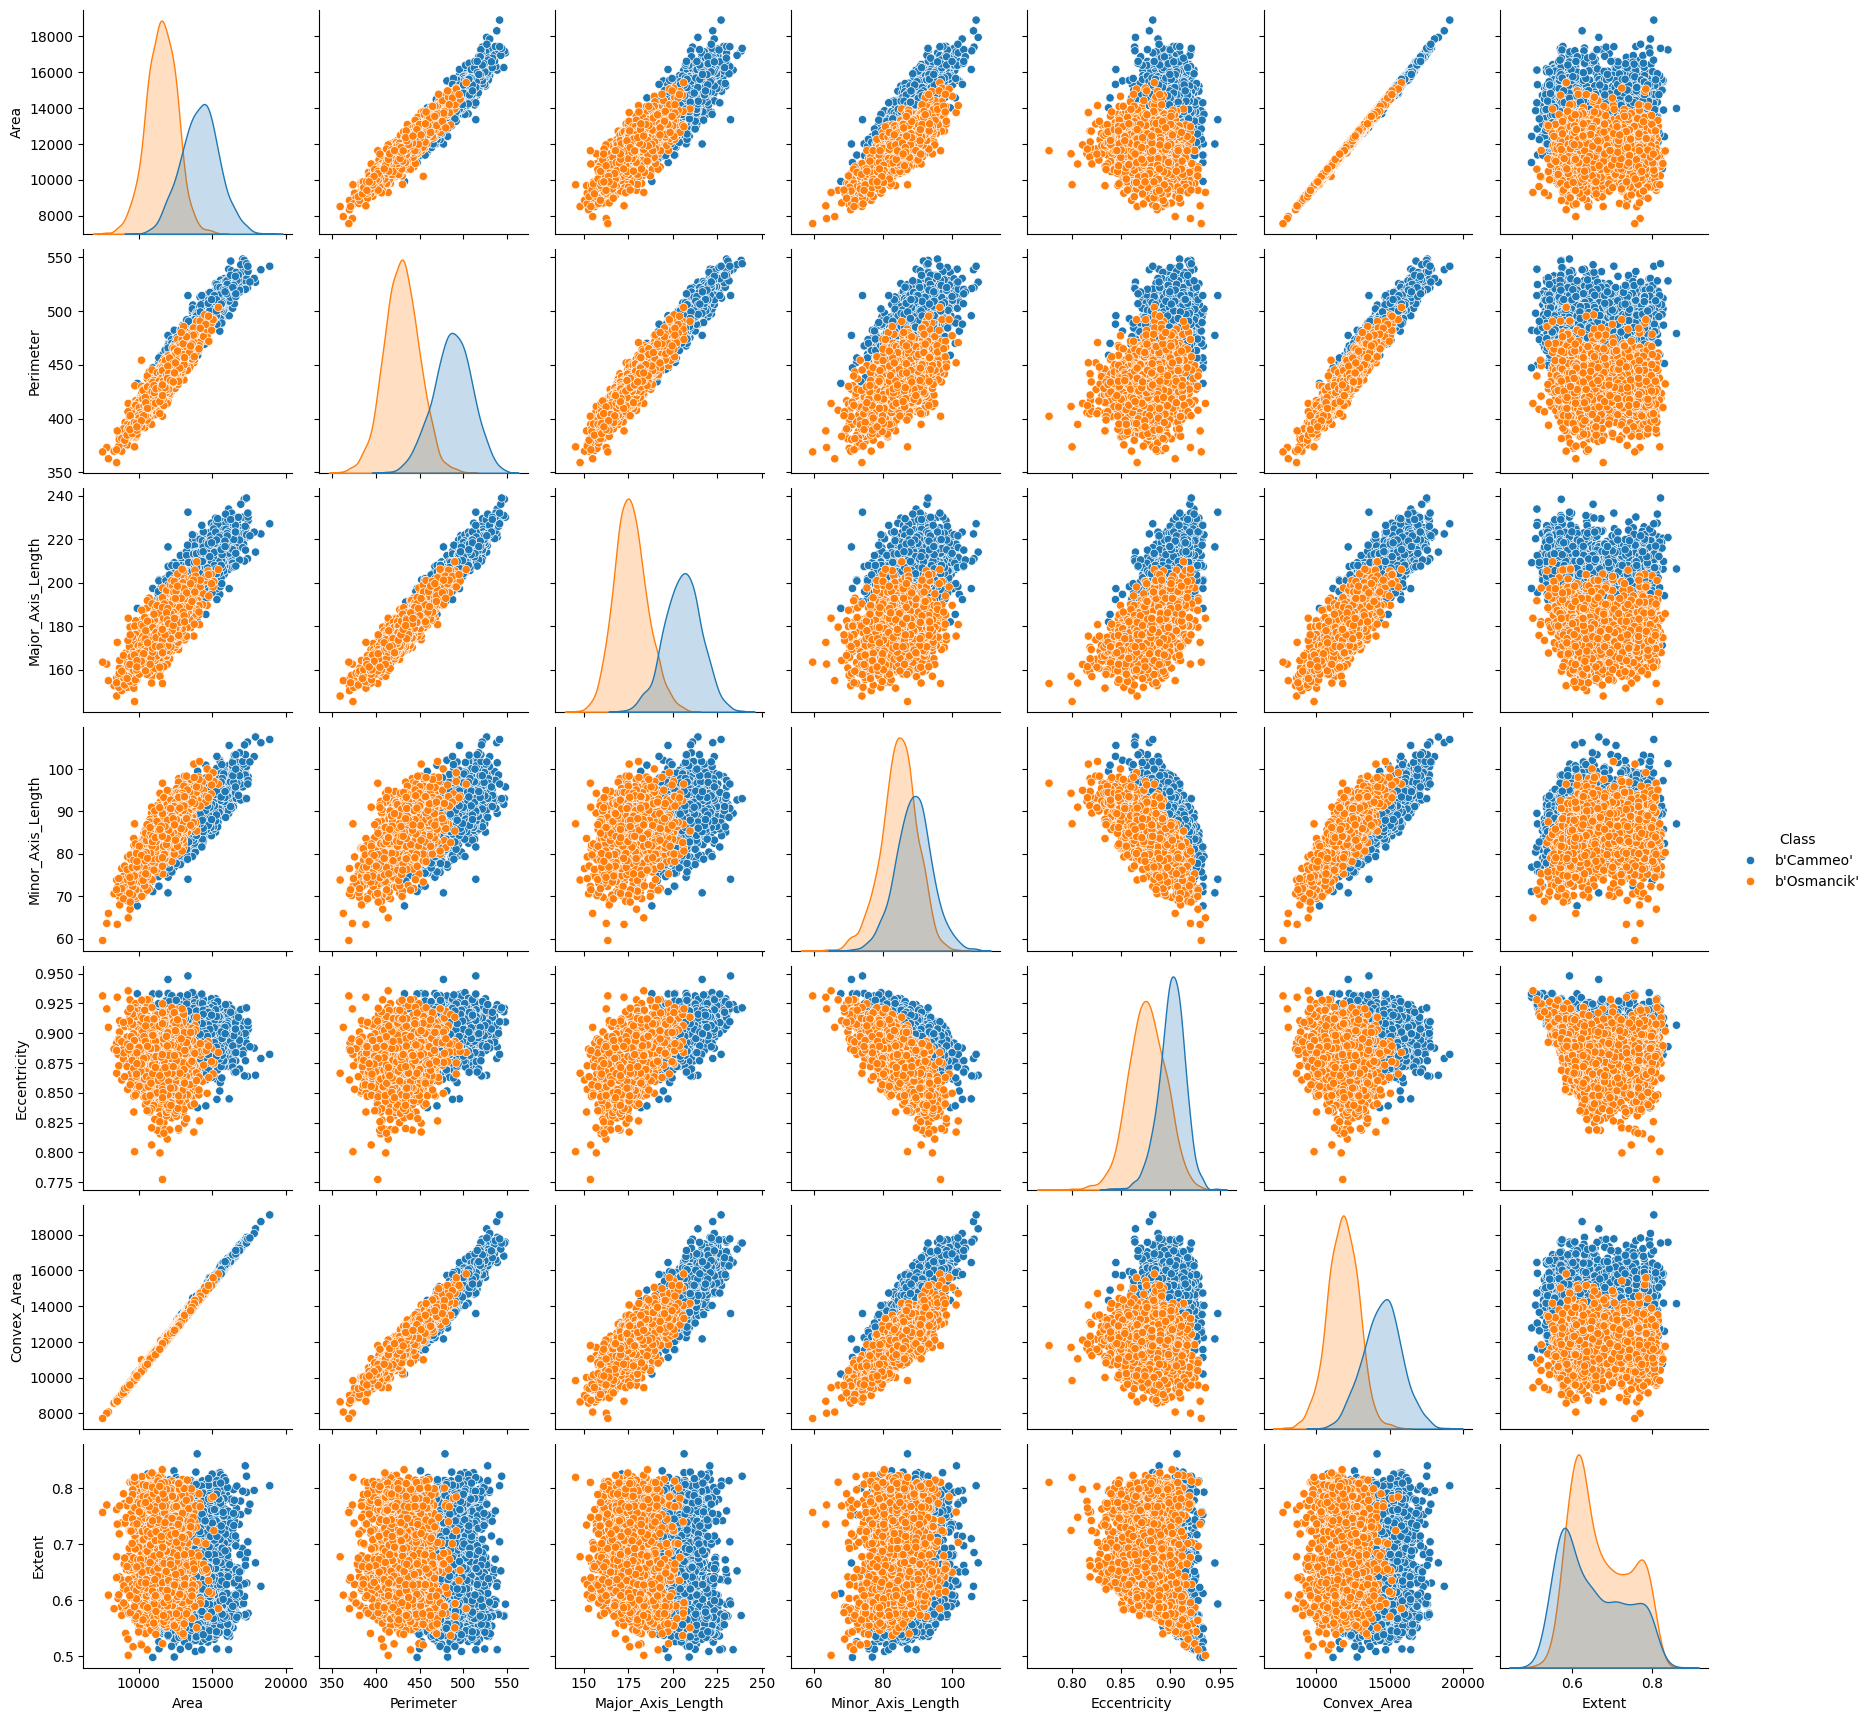

In [28]:
data, meta = arff.loadarff('Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data)

# Display basic information about the DataFrame
print(df.info())

# Check for missing values
print(df.isna().sum())

# Replace '?' with NaN and drop rows with missing values
df = df.replace('?', np.nan).dropna()

# EDA: Pairplot
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()

### Train Test split & model fitting

In [30]:
# Load ARFF file into a DataFrame
data, meta = arff.loadarff('Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data)

# Replace '?' with NaN and drop rows with missing values
df = df.replace(b'?', np.nan).dropna()

# Splitting the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model fitting
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction
base_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, base_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, base_pred))

# Feature Importance
print("Feature Importance:")
print(pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']))


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.